## Inports

In [1]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

2024-02-25 20:07:46.189008: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-25 20:07:46.190476: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-25 20:07:46.215209: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-25 20:07:46.215259: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-25 20:07:46.216248: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

2.15.0
2.15.0


In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

from keras.utils import to_categorical

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
seed = 42
np.random.seed(seed)

## MLP with one hidden layer

### Load data

xtrain.shape (60000, 28, 28)
ytrain.shape (60000,)
xtest.shape (10000, 28, 28)
ytest.shape (10000,)


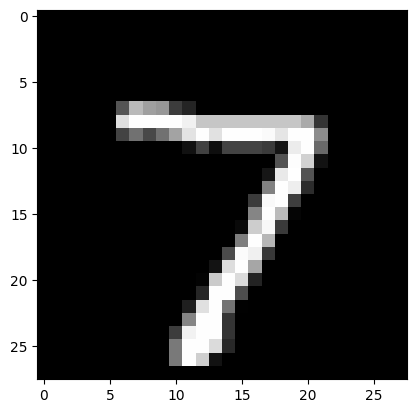

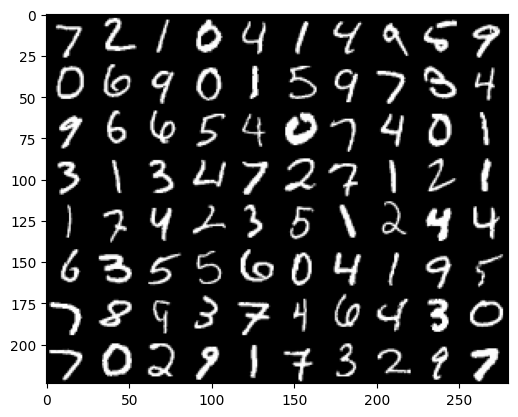

In [5]:
# load data
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
print('xtrain.shape',xtrain.shape)
print('ytrain.shape',ytrain.shape)
print('xtest.shape',xtest.shape)
print('ytest.shape',ytest.shape)

# show first example
plt.imshow(xtest[0,:,:], cmap=plt.get_cmap('gray'))

# show few more examples
rows = 8
cols = 10
counter = 0

images = None
for i in range(rows):
    current_row = None
    for j in range(cols):
        im = xtest[counter,:,:]
        counter = counter + 1
        if current_row is None:
            current_row = im
        else:
            current_row = np.hstack((current_row, im))
    if images is None:
        images = current_row
    else:
        images = np.vstack((images, current_row))

plt.figure()
plt.imshow(images, cmap=plt.get_cmap('gray'))

plt.show()

### Prepare data

In [6]:
# number of pixels = number of inputs
inputs_num = xtrain.shape[1] * xtrain.shape[2]
xtrain = xtrain.reshape(xtrain.shape[0], inputs_num).astype('float32')
xtest = xtest.reshape(xtest.shape[0], inputs_num).astype('float32')

# normalize inputs from <0,255> to <0,1>
xtrain = xtrain / 255
xtest = xtest / 255

print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


In [7]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
num_classes = ytest.shape[1]

### Model definition

In [8]:
model = Sequential()
model.add(Dense(500, input_dim=inputs_num, kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2024-02-25 20:07:48.177857: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-25 20:07:48.178122: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 10)                5010      
                                                                 
Total params: 397510 (1.52 MB)
Trainable params: 397510 (1.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model training

In [10]:
logger = keras.callbacks.ModelCheckpoint('mnist_model_MLP.hdf5', monitor='val_accuracy', verbose=0, save_best_only=True)

model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=20, batch_size=200, verbose=2, callbacks=[logger])

Epoch 1/20
300/300 - 1s - loss: 0.3196 - accuracy: 0.9100 - val_loss: 0.1572 - val_accuracy: 0.9550 - 1s/epoch - 5ms/step
Epoch 2/20


/home/damian/Documents/Python/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 - 1s - loss: 0.1283 - accuracy: 0.9639 - val_loss: 0.1064 - val_accuracy: 0.9679 - 1s/epoch - 3ms/step
Epoch 3/20
300/300 - 1s - loss: 0.0847 - accuracy: 0.9759 - val_loss: 0.0861 - val_accuracy: 0.9736 - 983ms/epoch - 3ms/step
Epoch 4/20
300/300 - 1s - loss: 0.0623 - accuracy: 0.9817 - val_loss: 0.0750 - val_accuracy: 0.9774 - 940ms/epoch - 3ms/step
Epoch 5/20
300/300 - 1s - loss: 0.0473 - accuracy: 0.9865 - val_loss: 0.0691 - val_accuracy: 0.9786 - 927ms/epoch - 3ms/step
Epoch 6/20
300/300 - 1s - loss: 0.0363 - accuracy: 0.9897 - val_loss: 0.0695 - val_accuracy: 0.9789 - 945ms/epoch - 3ms/step
Epoch 7/20
300/300 - 1s - loss: 0.0273 - accuracy: 0.9930 - val_loss: 0.0623 - val_accuracy: 0.9797 - 1s/epoch - 4ms/step
Epoch 8/20
300/300 - 1s - loss: 0.0209 - accuracy: 0.9949 - val_loss: 0.0616 - val_accuracy: 0.9811 - 1s/epoch - 3ms/step
Epoch 9/20
300/300 - 1s - loss: 0.0168 - accuracy: 0.9961 - val_loss: 0.0640 - val_accuracy: 0.9802 - 1s/epoch - 4ms/step
Epoch 10/20
300/300 - 1

### Model validation

In [11]:
scores = model.evaluate(xtest, ytest, verbose=0)
print("Test error: %.2f%%" % (100 - scores[1] * 100))

# best model from file
model_best = load_model('mnist_model_MLP.hdf5')
scores_best = model_best.evaluate(xtest, ytest, batch_size=200)
print("Best model error: %.2f%%" % (100 - scores_best[1] * 100))

Test error: 1.94%
50/50 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9825
Best model error: 1.75%


## Convolutional network

### Load data

In [12]:
# load data
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
print('xtrain.shape',xtrain.shape)
print('ytrain.shape',ytrain.shape)
print('xtest.shape',xtest.shape)
print('ytest.shape',ytest.shape)

xtrain.shape (60000, 28, 28)
ytrain.shape (60000,)
xtest.shape (10000, 28, 28)
ytest.shape (10000,)


### Prepare data

In [13]:
xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1).astype('float32')
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1).astype('float32')

# normalize inputs from <0,255> to <0,1>
xtrain = xtrain / 255
xtest = xtest / 255

ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
num_classes = ytest.shape[1]

### Model definition

In [14]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

### Model training

In [16]:
logger = keras.callbacks.ModelCheckpoint('mnist_model_CONV_SIMPLE.hdf5', monitor='val_accuracy', verbose=0, save_best_only=True)

model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=20, batch_size=200, verbose=2, callbacks=[logger])

Epoch 1/20
300/300 - 5s - loss: 0.2331 - accuracy: 0.9342 - val_loss: 0.0720 - val_accuracy: 0.9784 - 5s/epoch - 18ms/step
Epoch 2/20
300/300 - 5s - loss: 0.0702 - accuracy: 0.9792 - val_loss: 0.0489 - val_accuracy: 0.9845 - 5s/epoch - 16ms/step
Epoch 3/20
300/300 - 5s - loss: 0.0505 - accuracy: 0.9840 - val_loss: 0.0448 - val_accuracy: 0.9854 - 5s/epoch - 16ms/step
Epoch 4/20
300/300 - 5s - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0413 - val_accuracy: 0.9853 - 5s/epoch - 16ms/step
Epoch 5/20
300/300 - 5s - loss: 0.0329 - accuracy: 0.9895 - val_loss: 0.0370 - val_accuracy: 0.9881 - 5s/epoch - 16ms/step
Epoch 6/20
300/300 - 5s - loss: 0.0257 - accuracy: 0.9922 - val_loss: 0.0358 - val_accuracy: 0.9880 - 5s/epoch - 16ms/step
Epoch 7/20
300/300 - 5s - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0322 - val_accuracy: 0.9905 - 5s/epoch - 17ms/step
Epoch 8/20
300/300 - 5s - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0381 - val_accuracy: 0.9877 - 5s/epoch - 17ms/step
Epoch 9/20
300/3

### Model evaluation

In [17]:
scores = model.evaluate(xtest, ytest, verbose=0)
print("Test error: %.2f%%" % (100 - scores[1] * 100))

# best model from file
model_best = load_model('mnist_model_CONV_SIMPLE.hdf5')
scores_best = model_best.evaluate(xtest, ytest, batch_size=200)
print("Best model error: %.2f%%" % (100 - scores_best[1] * 100))

Test error: 1.04%
50/50 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9906
Best model error: 0.94%


## Bigger convolutional network

### Load data

In [18]:
# load data
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
print('xtrain.shape',xtrain.shape)
print('ytrain.shape',ytrain.shape)
print('xtest.shape',xtest.shape)
print('ytest.shape',ytest.shape)

xtrain.shape (60000, 28, 28)
ytrain.shape (60000,)
xtest.shape (10000, 28, 28)
ytest.shape (10000,)


### Prepare data

In [19]:
xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1).astype('float32')
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1).astype('float32')

# normalize inputs from <0,255> to <0,1>
xtrain = xtrain / 255
xtest = xtest / 255

ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
num_classes = ytest.shape[1]

### Model definition

In [20]:
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 15)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 15)          0         
                                                                 
 flatten_1 (Flatten)         (None, 375)              

### Model training

In [22]:
logger = keras.callbacks.ModelCheckpoint('mnist_model_CONV_BIGGER.hdf5', monitor='val_accuracy', verbose=0, save_best_only=True)

model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=20, batch_size=200, verbose=2, callbacks=[logger])

Epoch 1/20
300/300 - 4s - loss: 0.3994 - accuracy: 0.8688 - val_loss: 0.0803 - val_accuracy: 0.9748 - 4s/epoch - 14ms/step
Epoch 2/20
300/300 - 4s - loss: 0.0938 - accuracy: 0.9712 - val_loss: 0.0484 - val_accuracy: 0.9845 - 4s/epoch - 12ms/step
Epoch 3/20
300/300 - 4s - loss: 0.0680 - accuracy: 0.9789 - val_loss: 0.0360 - val_accuracy: 0.9879 - 4s/epoch - 12ms/step
Epoch 4/20
300/300 - 4s - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.0379 - val_accuracy: 0.9879 - 4s/epoch - 13ms/step
Epoch 5/20
300/300 - 4s - loss: 0.0456 - accuracy: 0.9854 - val_loss: 0.0318 - val_accuracy: 0.9896 - 4s/epoch - 12ms/step
Epoch 6/20
300/300 - 4s - loss: 0.0395 - accuracy: 0.9874 - val_loss: 0.0267 - val_accuracy: 0.9900 - 4s/epoch - 13ms/step
Epoch 7/20
300/300 - 4s - loss: 0.0355 - accuracy: 0.9885 - val_loss: 0.0266 - val_accuracy: 0.9917 - 4s/epoch - 13ms/step
Epoch 8/20
300/300 - 4s - loss: 0.0321 - accuracy: 0.9893 - val_loss: 0.0245 - val_accuracy: 0.9918 - 4s/epoch - 13ms/step
Epoch 9/20
300/3

### Model evaluation

In [23]:
scores = model.evaluate(xtest, ytest, verbose=0)
print("Test error: %.2f%%" % (100 - scores[1] * 100))

# best model from file
model_best = load_model('mnist_model_CONV_BIGGER.hdf5')
scores_best = model_best.evaluate(xtest, ytest, batch_size=200)
print("Best model error: %.2f%%" % (100 - scores_best[1] * 100))

Test error: 0.77%
50/50 [==============================] - 0s 5ms/step - loss: 0.0236 - accuracy: 0.9928
Best model error: 0.72%


## Model comparison

In [25]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
print('xtrain.shape',xtrain.shape)
print('ytrain.shape',ytrain.shape)
print('xtest.shape',xtest.shape)
print('ytest.shape',ytest.shape)

xtrain = xtrain.reshape(xtrain.shape[0], 784).astype('float32')
xtest = xtest.reshape(xtest.shape[0], 784).astype('float32')

xtrain = xtrain / 255
xtest = xtest / 255

ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

# MLP network
model = load_model('mnist_model_MLP.hdf5')
scores = model.evaluate(xtest, ytest, batch_size=200)
print("Test error (Model MLP): %.2f%%" % (100-scores[1]*100))

xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1).astype('float32')
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1).astype('float32')

# Simple convolutional network
model = load_model('mnist_model_CONV_SIMPLE.hdf5')
scores = model.evaluate(xtest, ytest, batch_size=200)
print("Test error (Model CONV SIMPLE): %.2f%%" % (100-scores[1]*100))

# Bigger convolutional network
model = load_model('mnist_model_CONV_BIGGER.hdf5')
scores = model.evaluate(xtest, ytest, batch_size=200)
print("Test error (Model CONV BIGGER): %.2f%%" % (100-scores[1]*100))

xtrain.shape (60000, 28, 28)
ytrain.shape (60000,)
xtest.shape (10000, 28, 28)
ytest.shape (10000,)
50/50 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9825
Test error (Model MLP): 1.75%
50/50 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.9906
Test error (Model CONV SIMPLE): 0.94%
50/50 [==============================] - 0s 5ms/step - loss: 0.0236 - accuracy: 0.9928
Test error (Model CONV BIGGER): 0.72%
